In [1]:
import os, sys
import time
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

# from models import ResNet as resnet_cifar

from models import ResNet as resnet_cifar

import pandas as pd
import argparse
import csv
from torch.optim.lr_scheduler import MultiStepLR
from dataLoader import DataLoader

from sklearn.metrics import confusion_matrix, classification_report    # 生成混淆矩阵函数
import matplotlib.pyplot as plt    # 绘图库
import os

print('Initialization')
print('Init Finished!')

Initialization
Init Finished!


In [2]:
args_depth = 20
num_classes = 10
args_dataset = 'cifar-10'
args_batch_size = 256
args_depth = 20
num_classes = 10

PATH = '../tb_dir/learnable_mask/test_256bs_200epoch_layer3_noL1'

In [3]:
# Data Loader
loader = DataLoader(args_dataset,batch_size=args_batch_size)
dataloaders,dataset_sizes = loader.load_data()

Files already downloaded and verified
Files already downloaded and verified


In [4]:
def load_model(path):
    model_path = os.path.join(path, 'saved_model.pt')
    model = resnet_cifar(depth=args_depth, num_classes=num_classes)
#     model = AlexNet(num_classes=num_classes)
    model = model.cuda()
    model = torch.nn.DataParallel(model)

    model.load_state_dict(torch.load(model_path))
#     model = torch.load(model_path)
    print('Successfully Load Model: ', os.path.basename(model_path))
    return model

In [5]:
def printF(i, total=100):
    i = int( i / total * 100) + 1
    total = 100
    k = i + 1
    str_ = '>'*i + '' ''*(total-k)
    sys.stdout.write('\r'+str_+'[%s%%]'%(i+1))
    sys.stdout.flush()
    if(i >= total -1): print()

In [6]:
def get_weights(model):
    conv_layers_weights = dict()
    for name, param in model.named_parameters():
#         print(name,param.shape)
        conv_layers_weights[name] = param
        if name == 'module.mask':
            return param

In [7]:
model = load_model(PATH)
weights = get_weights(model)
weights = weights.cpu().detach().numpy()
weights = np.transpose(weights)
print(weights.shape)


Successfully Load Model:  saved_model.pt
(10, 64)


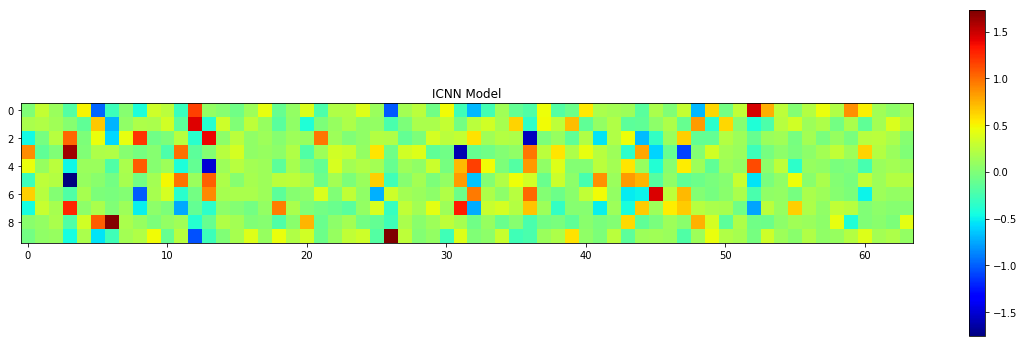

In [8]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
im = ax.imshow(weights,cmap=plt.cm.jet)
plt.colorbar(im,orientation='vertical')
plt.title('ICNN Model')
plt.show()